# Multiple Regression Analysis: Inference

In [1]:
import pandas as pd
import numpy as np
import wooldridge
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
wooldridge.data()

  J.M. Wooldridge (2019) Introductory Econometrics: A Modern Approach,
  Cengage Learning, 6th edition.

  401k       401ksubs    admnrev       affairs     airfare
  alcohol    apple       approval      athlet1     athlet2
  attend     audit       barium        beauty      benefits
  beveridge  big9salary  bwght         bwght2      campus
  card       catholic    cement        census2000  ceosal1
  ceosal2    charity     consump       corn        countymurders
  cps78_85   cps91       crime1        crime2      crime3
  crime4     discrim     driving       earns       econmath
  elem94_95  engin       expendshares  ezanders    ezunem
  fair       fertil1     fertil2       fertil3     fish
  fringe     gpa1        gpa2          gpa3        happiness
  hprice1    hprice2     hprice3       hseinv      htv
  infmrt     injury      intdef        intqrt      inven
  jtrain     jtrain2     jtrain3       kielmc      lawsch85
  loanapp    lowbrth     mathpnl       meap00_01   meap01
  meap93    

## Examples

In [ ]:
wage1 = wooldridge.data("wage1")
meap93 = wooldridge.data("meap93")
gpa1 = wooldridge.data("gpa1")
campus = wooldridge.data("campus")
hprice2 = wooldridge.data("hprice2")
k401 = wooldridge.data("401k")
jtrain = wooldridge.data("jtrain")
rdchem = wooldridge.data("rdchem")
bwght = wooldridge.data("bwght")

### 4.1 Hourly Wage Equation

In [ ]:
wooldridge.data("wage1", description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [ ]:
model01 = smf.ols("np.log(wage) ~ educ + exper + tenure", data=wage1).fit()
model01.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,0.284360,0.104190
educ,0.092029,0.007330
exper,0.004121,0.001723
tenure,0.022067,0.003094


$$H_0: \beta_{exper} = 0 \qquad H_0: \beta_{exper} > 0 $$

We got exper has $\beta = 0.0041$ with a standard error of $0.0017$  
SO the t statistic is $0.0041/0.0017 = 2.41$, t critical is 1.645 at 5\% and 2.326 at 1\%,   
t statistic > t critical  $\rightarrow$ we reject the null hypothesis at 1\% significance level

$\hat \beta_{exper}$ is greater than zero

### 4.2 Student Performance And School Size

In [ ]:
wooldridge.data("meap93", description=True)

name of dataset: meap93
no of variables: 17
no of observations: 408

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| lnchprg  | perc of studs in sch lnch prog  |
| enroll   | school enrollment               |
| staff    | staff per 1000 students         |
| expend   | expend. per stud, $             |
| salary   | avg. teacher salary, $          |
| benefits | avg. teacher benefits, $        |
| droprate | school dropout rate, perc       |
| gradrate | school graduation rate, perc    |
| math10   | perc studs passing MEAP math    |
| sci11    | perc studs passing MEAP science |
| totcomp  | salary + benefits               |
| ltotcomp | log(totcomp)                    |
| lexpend  | log of expend                   |
| lenroll  | log(enroll)                     |
| lstaff   | log(staff)                      |
| bensal   | benefits/salary                 |
| lsalary  | log(salary)              

In [ ]:
model02 = smf.ols("math10 ~ totcomp + staff + enroll", data=meap93).fit()
model02.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,2.274021,6.113794
totcomp,0.000459,0.000100
staff,0.047920,0.039814
enroll,-0.000198,0.000215


$$H_0: \beta_{enroll} = 0 \qquad H_0: \beta_{enroll} < 0 $$

It is believed that smaller schools are associated with higher test scores  
We get $\beta = -0.0002$ similar to the conjecture  
The critical t is $t =-1.65$ at degree of freedoms $n-k-1 = 408-4=404$
t statistic is $0.0002 / 0.00022 \approx -0.91 \rightarrow$ we fail to reject $H_0$  
school size is not statistically significant

In [ ]:
model022 = smf.ols("math10 ~ ltotcomp + lstaff + lenroll", data=meap93).fit()
model022.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,-207.664785,48.703125
ltotcomp,21.154997,4.055549
lstaff,3.980018,4.189660
lenroll,-1.268046,0.693204


If we take level log form, $t = -1.268/0.6932 \approx -1.87 \rightarrow$ we reject $H_0$  
If enrollment increases by 10%, math score is expected to decrease by 0.13 percentage points

In [9]:
model02.rsquared, model022.rsquared

(np.float64(0.0540626230832697), np.float64(0.06537749365652679))

level log model has higher $R^2$ so its better than level level model

### 4.3 Determinants of College GPA

In [ ]:
wooldridge.data("gpa1", description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

In [ ]:
model03 = smf.ols("colGPA ~ hsGPA + ACT + skipped", data=gpa1).fit()
model03.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,1.389554,0.331554
hsGPA,0.411816,0.093674
ACT,0.014720,0.010565
skipped,-0.083113,0.025999


$$H_0: \beta = 0 \qquad H_0: \beta \neq 0 $$

In two sided alternatives, 5% critical value is 1.96 at df = $141-4=147$ and 1% at 2.58  
hsGPA has $t = 4.38 \rightarrow$  
ACT has small coefficient and is practically and statistically insignificant  
skipped has $t= -3.19 \rightarrow$ statistically significant

### 4.4 Campus Crime and Enrollment

In [ ]:
wooldridge.data("campus", description=True)

name of dataset: campus
no of variables: 7
no of observations: 97

+----------+-----------------------+
| variable | label                 |
+----------+-----------------------+
| enroll   | total enrollment      |
| priv     | =1 if private college |
| police   | employed officers     |
| crime    | total campus crimes   |
| lcrime   | log(crime)            |
| lenroll  | log(enroll)           |
| lpolice  | log(police)           |
+----------+-----------------------+

These data were collected by Daniel Martin, a former MSU
undergraduate, for a final project. They come from the FBI Uniform
Crime Reports and are for the year 1992.


In [ ]:
model04 = smf.ols("lcrime ~ lenroll", data=campus).fit()
model04.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,-6.63137,1.033540
lenroll,1.26976,0.109776


$$H_0: \beta_1 =1 \qquad H_1: \beta_1 >1 $$

We didn't test for $\beta_1 = 0$ cuz its expected, $\beta_1 =1$ is more interesting, if $\beta_1 >1$, then crime is a big problem on large campuses  
$$ crime = \exp(\beta_0)enroll^{\beta_1}\exp(u)$$

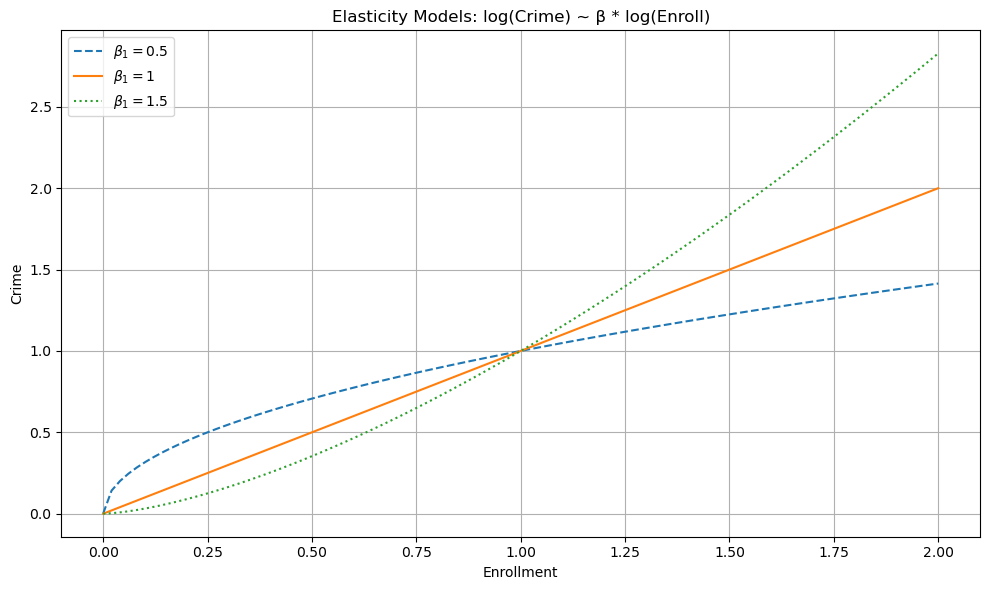

In [ ]:
enroll = np.linspace(0.000001, 2, 100)


crime_elastic_05 = np.exp(0.5 * np.log(enroll))  # β = 0.5
crime_elastic_1 = np.exp(1.0 * np.log(enroll))  # β = 1.0
crime_elastic_15 = np.exp(1.5 * np.log(enroll))  # β = 1.5

plt.figure(figsize=(10, 6))
plt.plot(enroll, crime_elastic_05, label=r"$\beta_1 = 0.5$", linestyle="--")
plt.plot(enroll, crime_elastic_1, label=r"$\beta_1 = 1$", linestyle="-")
plt.plot(enroll, crime_elastic_15, label=r"$\beta_1 = 1.5$", linestyle=":")

plt.xlabel("Enrollment")
plt.ylabel("Crime")
plt.title("Elasticity Models: log(Crime) ~ β * log(Enroll)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

the t statistic reported $0.11$ is for testing $\beta = 0$  
The t statistic we need is
$$ \dfrac{1.27 - 1}{0.11} \approx 2.45 $$  
reject $H_0$

In [15]:
model04.t_test("lenroll = 1").tvalue[0]

array([2.45736997])

### 4.5 Housing Prices and Air Pollution

In [ ]:
wooldridge.data("hprice2", description=True)

name of dataset: hprice2
no of variables: 12
no of observations: 506

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| price    | median housing price, $       |
| crime    | crimes committed per capita   |
| nox      | nit ox concen; parts per 100m |
| rooms    | avg number of rooms           |
| dist     | wght dist to 5 employ centers |
| radial   | access. index to rad. hghwys  |
| proptax  | property tax per $1000        |
| stratio  | average student-teacher ratio |
| lowstat  | perc of people 'lower status' |
| lprice   | log(price)                    |
| lnox     | log(nox)                      |
| lproptax | log(proptax)                  |
+----------+-------------------------------+

D. Harrison and D.L. Rubinfeld (1978), “Hedonic Housing Prices and the
Demand for Clean Air,” by Harrison, D. and D.L.Rubinfeld, Journal of
Environmental Economics and Management 5, 81-102. Diego Garcia, a
for

In [ ]:
model05 = smf.ols("lprice ~ lnox + np.log(dist) + rooms + stratio", data=hprice2).fit()
model05.summary2().tables[1].iloc[:, :2]

,Coef.,Std.Err.
Intercept,11.083862,0.318111
lnox,-0.953539,0.116742
np.log(dist),-0.134339,0.043103
rooms,0.254527,0.018530
stratio,-0.052451,0.005897


$$H_0: \beta_1 = -1 \qquad H_1: \beta_1 \neq -1 $$

$$ t = \frac{-0.954 + 1}{0.117} = 0.393$$  
t is so small, we fail to reject $H_0$

In [18]:
model05.t_test("lnox = -1").tvalue[0]

array([0.3979827])

### 4.6 Participation Rates in 401(k) Plans

In [ ]:
wooldridge.data("401k", description=True)

name of dataset: 401k
no of variables: 8
no of observations: 1534

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| prate    | participation rate, percent     |
| mrate    | 401k plan match rate            |
| totpart  | total 401k participants         |
| totelg   | total eligible for 401k plan    |
| age      | age of 401k plan                |
| totemp   | total number of firm employees  |
| sole     | = 1 if 401k is firm's sole plan |
| ltotemp  | log of totemp                   |
+----------+---------------------------------+

L.E. Papke (1995), “Participation in and Contributions to 401(k)
Pension Plans:Evidence from Plan Data,” Journal of Human Resources 30,
311-325. Professor Papke kindly provided these data. She gathered them
from the Internal Revenue Service’s Form 5500 tapes.


In [ ]:
model06 = smf.ols("prate ~ mrate + age + totemp", data=k401).fit()
model06.summary2().tables[1].iloc[:, :4]

,Coef.,Std.Err.,t,P>|t|
Intercept,80.294053,0.777727,103.241902,0.000000e+00
mrate,5.442221,0.524419,10.377620,1.982834e-24
age,0.269198,0.045145,5.962976,3.070325e-09
totemp,-0.000129,0.000037,-3.520881,4.427334e-04


All variables are statistically significant, but totemp has very small coefficient making it practically insignificant

### 4.7 Effect of Job Training On Firm Scrap Rates

In [ ]:
wooldridge.data("jtrain", description=True)

name of dataset: jtrain
no of variables: 30
no of observations: 471

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| year     | 1987, 1988, or 1989             |
| fcode    | firm code number                |
| employ   | # employees at plant            |
| sales    | annual sales, $                 |
| avgsal   | average employee salary         |
| scrap    | scrap rate (per 100 items)      |
| rework   | rework rate (per 100 items)     |
| tothrs   | total hours training            |
| union    | =1 if unionized                 |
| grant    | = 1 if received grant           |
| d89      | = 1 if year = 1989              |
| d88      | = 1 if year = 1988              |
| totrain  | total employees trained         |
| hrsemp   | tothrs/totrain                  |
| lscrap   | log(scrap)                      |
| lemploy  | log(employ)                     |
| lsales   | log(sales)               

In [ ]:
df = jtrain[(jtrain["year"] == 1987) & (jtrain["union"] == 0)]

model07 = smf.ols(
    "np.log(scrap)~hrsemp + np.log(sales) + np.log(employ)", data=df
).fit()
model07.summary2().tables[1].iloc[:, :4]

,Coef.,Std.Err.,t,P>|t|
Intercept,12.458372,5.686771,2.190764,0.038007
hrsemp,-0.029269,0.022805,-1.283453,0.211103
np.log(sales),-0.962027,0.452518,-2.125941,0.043564
np.log(employ),0.761470,0.407433,1.868947,0.073390


One more hour of training per employee [hrsemp] lowers scrap by 2.9%  
t statistic is small, its not statistically significant

In [23]:
model07.nobs

29.0

In [24]:
len(df)

126

In [ ]:
cols = ["scrap", "hrsemp", "sales", "employ"]
df[cols].dropna().shape[0]

29

Although the data has 126 rows, only 29 rows have no missing data in the rows of columns we use in the regression

In [ ]:
from scipy import stats

coef = model07.params["hrsemp"]
se = model07.bse["hrsemp"]

t_stat = coef / se

# One-sided p-value (lower tail)
stats.t.cdf(t_stat, df=model07.df_resid)

np.float64(0.10555164060312987)

Due to the small sample size, we calculate p value for one sided test at 10% significance level and get 0.106, its almost rejected

### 4.8 Model of R&D Expenditures

In [ ]:
wooldridge.data("rdchem", description=True)

name of dataset: rdchem
no of variables: 8
no of observations: 32

+----------+-----------------------------+
| variable | label                       |
+----------+-----------------------------+
| rd       | R&D spending, millions      |
| sales    | firm sales, millions        |
| profits  | profits, millions           |
| rdintens | rd as percent of sales      |
| profmarg | profits as percent of sales |
| salessq  | sales^2                     |
| lsales   | log(sales)                  |
| lrd      | log(rd)                     |
+----------+-----------------------------+

From Businessweek R&D Scoreboard, October 25, 1991.


In [ ]:
model08 = smf.ols("lrd ~ lsales + profmarg", data=rdchem).fit()
model08.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-4.378273,0.468018,-9.354915,2.930084e-10,-5.335479,-3.421068
lsales,1.084220,0.060195,18.011789,2.746717e-17,0.961107,1.207333
profmarg,0.021656,0.012783,1.694150,1.009521e-01,-0.004488,0.047799


Holding profit margin fixed, 1% increase in sales is associated with 1.084% increase in R&D spending  
The 95% Confidence interval is [0.96 - 1.21] which doesn't include 0 leading to rejection of $H_0$  
But it includes the unity 1, so 1% increase in sales is associated with 1% increase in R&D spending

The 95% Confidence interval for profit margin is [-0.005, 0.05] which includes the zero, we fail to reject $H_0$ at the 5% significance level using a two-sided test 
However, using a one-sided alternative hypothesis $H_1: \beta_2 > 0$, the one-sided p-value is 0.0504, making the coefficient statistically significant at the 5% level.   
This suggests that a 1-unit increase in profit margin, holding sales constant, is associated with a 2.2% increase in R&D spending, on average.

In [ ]:
coef = model08.params["profmarg"]
se = model08.bse["profmarg"]

t_stat = coef / se

# One-sided p-value (upper tail)
1 - stats.t.cdf(t_stat, df=model08.df_resid)

np.float64(0.05047604323767163)

### 4.9 Parents Education in a Birth Weight Equation

In [ ]:
wooldridge.data("bwght", description=True)

name of dataset: bwght
no of variables: 14
no of observations: 1388

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| faminc   | 1988 family income, $1000s     |
| cigtax   | cig. tax in home state, 1988   |
| cigprice | cig. price in home state, 1988 |
| bwght    | birth weight, ounces           |
| fatheduc | father's yrs of educ           |
| motheduc | mother's yrs of educ           |
| parity   | birth order of child           |
| male     | =1 if male child               |
| white    | =1 if white                    |
| cigs     | cigs smked per day while preg  |
| lbwght   | log of bwght                   |
| bwghtlbs | birth weight, pounds           |
| packs    | packs smked per day while preg |
| lfaminc  | log(faminc)                    |
+----------+--------------------------------+

J. Mullahy (1997), “Instrumental-Variable Estimation of Count Data
Models: Applications to Models of C

In [ ]:
df = bwght[["bwght", "cigs", "parity", "faminc", "motheduc", "fatheduc"]].dropna()

model09 = smf.ols("bwght ~ cigs + parity + faminc + motheduc + fatheduc", data=df).fit()
model09.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,114.524328,3.728453,30.716314,6.865252e-153,107.209223,121.839433
cigs,-0.595936,0.110348,-5.400524,8.023483e-08,-0.812435,-0.379437
parity,1.787603,0.659406,2.710932,6.806379e-03,0.493871,3.081336
faminc,0.056041,0.036562,1.532794,1.255936e-01,-0.015691,0.127774
motheduc,-0.370450,0.319855,-1.158182,2.470233e-01,-0.997996,0.257095
fatheduc,0.472394,0.282643,1.671345,9.491758e-02,-0.082143,1.026931


In [ ]:
model09r = smf.ols("bwght ~ cigs + parity + faminc", data=df).fit()
model09r.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,115.469925,1.655898,69.732508,0.000000e+00,112.221112,118.718738
cigs,-0.597852,0.108770,-5.496474,4.739231e-08,-0.811255,-0.384449
parity,1.832274,0.657540,2.786558,5.411973e-03,0.542203,3.122345
faminc,0.067062,0.032394,2.070204,3.864909e-02,0.003506,0.130617


In [ ]:
R2_ur = model09.rsquared
R2_r = model09r.rsquared
n = model09.nobs
k_ur = model09.df_model + 1
q = 2

In [50]:
numerator = (R2_ur - R2_r) / q
denominator = (1 - R2_ur) / (n - k_ur)
F_stat = numerator / denominator
F_stat

np.float64(1.437268638975128)

$$H_0: \beta_4 =0, \beta_5 = 0$$

To test the joint significance of parents' education, we must ensure both the unrestricted and restricted models use the same observations.

Therefore, we first subset the data to exclude any rows with missing values in the unrestricted model. This ensures both models are estimated on the same sample, allowing a valid comparison.

Note: If you use statsmodels's built-in .f_test() function after fitting the unrestricted model, it automatically uses the correct sample. So you do not need to drop missing values manually in that case.

In [ ]:
model092 = smf.ols(
    "bwght ~ cigs + parity + faminc + motheduc + fatheduc", data=bwght
).fit()



model092.f_test("motheduc = 0, fatheduc = 0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.4372686389751854, p=0.23798962194786966, df_denom=1.18e+03, df_num=2>

We fail to reject the null hypothesis. In other words, parents education is jointly insignificant

### 4.10 Salary-Pension Tradeoff for Teachers

if totcomp [total compensation] includes annual salary of teacher and benefits [like insurance]  
then
$$ totcomp = salary + benefits$$
which can be rewritten as
$$ totcomp = salary \left( 1 + \dfrac{benefits}{salary} \right)$$
take the log to get
$$ \log(totcomp) = \log(salary) + \log \left(1+ \dfrac b s \right) $$
for small $\dfrac b s$, we have the approximation
$$ \log(totcomp) = \log(salary) + \dfrac b s  $$
To understandard salary-benefits tradeoffs, get the econometric model
$$ \log(salary) = \beta_0 + \beta_1 \dfrac b s + u$$

To test salary benefits tradeoff, test $H_0: \beta_1 = -1$  
The simple regression fails to reject the null, but it becomes significant after adding controls

In [ ]:
df = meap93.copy()
df["bs_ratio"] = df["benefits"] / df["salary"]
model010 = smf.ols("lsalary ~ bs_ratio", data=df).fit()
model010.summary2().tables[1].iloc[:, :4]

,Coef.,Std.Err.,t,P>|t|
Intercept,10.523181,0.041560,253.203306,0.000000
bs_ratio,-0.825395,0.199895,-4.129144,0.000044


In [ ]:
model010.t_test("bs_ratio = -1")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.8254      0.200      0.873      0.383      -1.218      -0.432

### 4.11 Evaluating a Job Training Program

## 🚧 Computer Exercises